In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import vgg16
from tensorflow.keras.optimizers import Adam, SGD
import scipy 
import glob
import os
from PIL import Image



import numpy as np 
import glob
from sklearn.metrics import confusion_matrix , accuracy_score
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from numpy.linalg import eigh

In [3]:
dataset = []
label = []

In [4]:
path = '/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Brain_Tumor_MRI/Training/glioma/*'
for f in glob.iglob(path):
    img1=cv2.imread(f)
    img1 = Image.fromarray(img1, 'RGB')
    img1 = img1.resize((224, 224))
    dataset.append(np.array(img1))
    label.append(0)

In [5]:
path = '/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Brain_Tumor_MRI/Training/meningioma/*'
for f in glob.iglob(path):
    img2=cv2.imread(f)
    img2 = Image.fromarray(img2, 'RGB')
    img2 = img2.resize((224, 224))
    dataset.append(np.array(img2))
    label.append(1)

In [6]:
path = '/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Brain_Tumor_MRI/Training/pituitary/*'
for f in glob.iglob(path):
    img3=cv2.imread(f)
    img3 = Image.fromarray(img3, 'RGB')
    img3 = img3.resize((224, 224))
    dataset.append(np.array(img3))
    label.append(2)

In [7]:
path = '/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Brain_Tumor_MRI/Training/notumor/*'
for f in glob.iglob(path):
    img4=cv2.imread(f)
    img4 = Image.fromarray(img4, 'RGB')
    img4 = img4.resize((224, 224))
    dataset.append(np.array(img4))
    label.append(3)

In [8]:
path = '/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Dataset_Option2/archive/Multiple Sclerosis/Control-Axial/*'
for f in glob.iglob(path):
    img5 =cv2.imread(f)
    img5 = Image.fromarray(img5, 'RGB')
    img5 = img5.resize((224, 224))
    dataset.append(np.array(img5))
    label.append(4)

In [9]:
path = '/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Dataset_Option2/archive/Multiple Sclerosis/MS-Axial/*'
for f in glob.iglob(path):
    img6 =cv2.imread(f)
    img6 = Image.fromarray(img6, 'RGB')
    img6 = img6.resize((224, 224))
    dataset.append(np.array(img6))
    label.append(5)

In [10]:
path = '/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Dataset_Option2/archive/Multiple Sclerosis/Control-Sagittal/*'
for f in glob.iglob(path):
    img7=cv2.imread(f)
    img7 = Image.fromarray(img7, 'RGB')
    img7 = img7.resize((224, 224))
    dataset.append(np.array(img7))
    label.append(6)

In [11]:
path = '/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Dataset_Option2/archive/Multiple Sclerosis/MS-Sagittal/*'
for f in glob.iglob(path):
    img8=cv2.imread(f)
    img8 = Image.fromarray(img8, 'RGB')
    img8 = img8.resize((224, 224))
    dataset.append(np.array(img8))
    label.append(7)

In [12]:
len(dataset)

9139

/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Brain_Tumor_MRI/Training/glioma


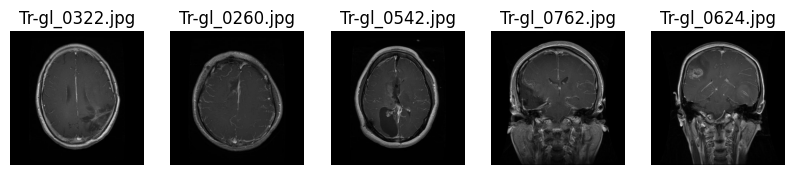

/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Brain_Tumor_MRI/Training/meningioma


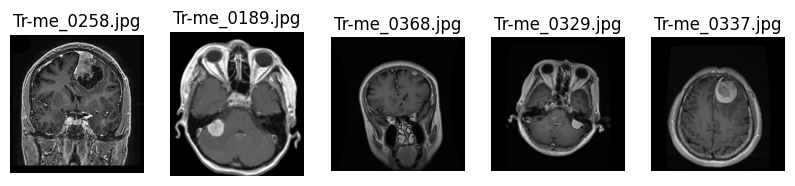

/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Brain_Tumor_MRI/Training/pituitary


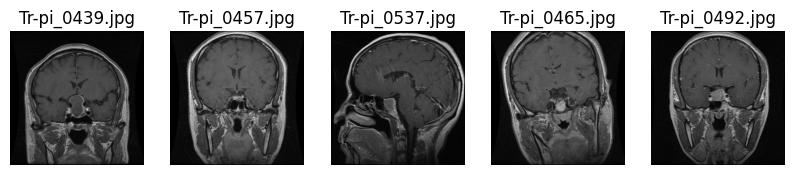

/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Brain_Tumor_MRI/Training/notumor


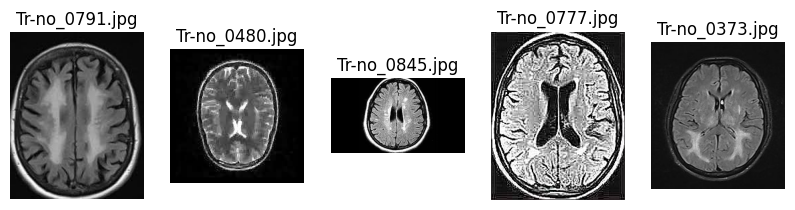

/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Dataset_Option2/archive/Multiple Sclerosis/Control-Axial


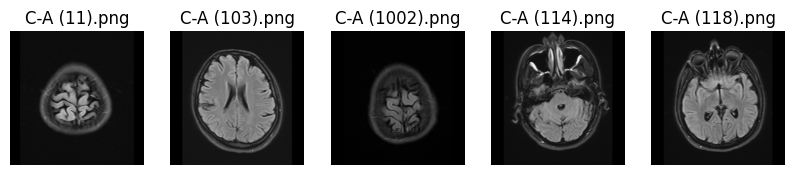

/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Dataset_Option2/archive/Multiple Sclerosis/MS-Axial


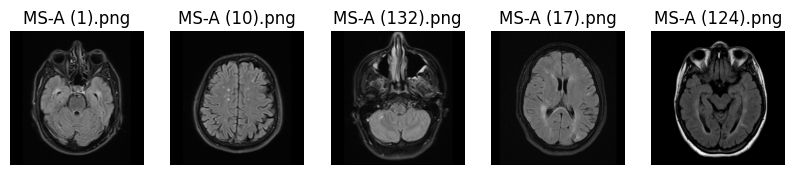

/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Dataset_Option2/archive/Multiple Sclerosis/Control-Sagittal


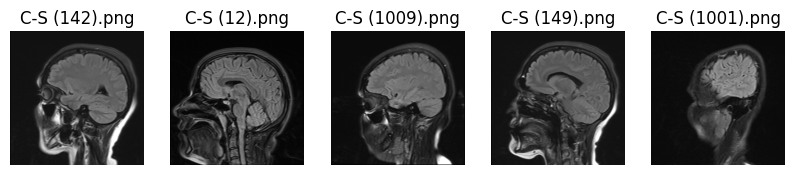

/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Dataset_Option2/archive/Multiple Sclerosis/MS-Sagittal


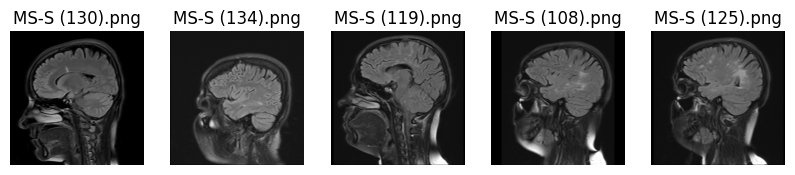

In [13]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define paths
paths = ['/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Brain_Tumor_MRI/Training/glioma',     
         '/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Brain_Tumor_MRI/Training/meningioma',      
         '/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Brain_Tumor_MRI/Training/pituitary',      
         '/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Brain_Tumor_MRI/Training/notumor', 
         '/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Dataset_Option2/archive/Multiple Sclerosis/Control-Axial' , 
         '/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Dataset_Option2/archive/Multiple Sclerosis/MS-Axial' , 
         '/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Dataset_Option2/archive/Multiple Sclerosis/Control-Sagittal' , 
         '/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Dataset_Option2/archive/Multiple Sclerosis/MS-Sagittal']

# Loop through paths and display example images
for path in paths:
    print(path)
    files = os.listdir(path)
    num_images = min(len(files), 5)  # Display up to 5 images
    fig, axes = plt.subplots(1, num_images, figsize=(10, 10))
    for i in range(num_images):
        image = Image.open(os.path.join(path, files[i]))
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(files[i])
        axes[i].axis('off')
    plt.show()

dataset = np.array(dataset)
label = np.array(label)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(dataset, label, test_size = 0.30, random_state = 0)

In [15]:
X_train = X_train /255.
X_test = X_test /255.

In [16]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [17]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [22]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow import keras
import os
import cv2
import timeit
import numpy as np 
import pandas as pd
from PIL import Image
from tensorflow import keras
import tensorflow as tf
from keras import Model
import matplotlib.pyplot as plt
from keras.metrics import MeanIoU
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import SGD,Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import load_img ,img_to_array
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from tensorflow.keras.layers import MaxPooling2D,BatchNormalization,Conv2D,Dense,Activation,Conv2DTranspose,Input
from tensorflow.keras.layers import Input, Activation, BatchNormalization, Dropout, Lambda, Conv2D
from tensorflow.keras.layers import Conv2DTranspose, MaxPooling2D, concatenate, AveragePooling2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Flatten,Dropout,SpatialDropout2D,AveragePooling2D,GlobalAveragePooling2D,Concatenate

from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam
from keras.layers import Flatten
from keras.layers import Dense
from IPython.display import Image, display
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from keras import models, layers
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report




from tensorflow.keras.optimizers import SGD

from keras.callbacks import EarlyStopping,ModelCheckpoint

from keras.layers import MaxPool2D

from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# define the input tensor
input_tensor = keras.layers.Input(shape=(224,224,3))

# build the convolutional base
vgg19 = keras.applications.vgg19.VGG19(weights='imagenet', include_top=False, input_tensor=input_tensor)
for layer in vgg19.layers: 
    layer.trainable = False

# add skip connections
x = vgg19.output
x = keras.layers.Flatten()(x)
x = keras.layers.BatchNormalization()(x)

# add L2 regularization to the fully connected layers
x1 = keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
x1 = keras.layers.Dropout(0.5)(x1)
x2 = keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x1)
x2 = keras.layers.Dropout(0.5)(x2)
x3 = keras.layers.Dense(132, activation='relu', kernel_regularizer=l2(0.01))(x2)
x3 = keras.layers.Dropout(0.5)(x3)

x = keras.layers.Concatenate()([x, x1, x2, x3])
predictions = keras.layers.Dense(8, activation='softmax')(x)

# create the model
full_model = keras.models.Model(inputs=input_tensor, outputs=predictions)

# compile the model
full_model.compile(loss='categorical_crossentropy',
                    optimizer=keras.optimizers.Adamax(learning_rate=0.00001),
                    metrics=['accuracy'])

# print the model summary
full_model.summary()

# train the model with callbacks
checkp = ModelCheckpoint('./unet_model.h5', monitor='accuracy', save_best_only=True, verbose=1)
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1, restore_best_weights=True)
history = full_model.fit(X_train, y_train, batch_size=8, epochs=200, validation_data=(X_test, y_test), workers=10, callbacks=[checkp])



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 224, 224, 64  1792        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 224, 224, 64  36928       ['block1_conv1[0][0]']           
                                )                                                           

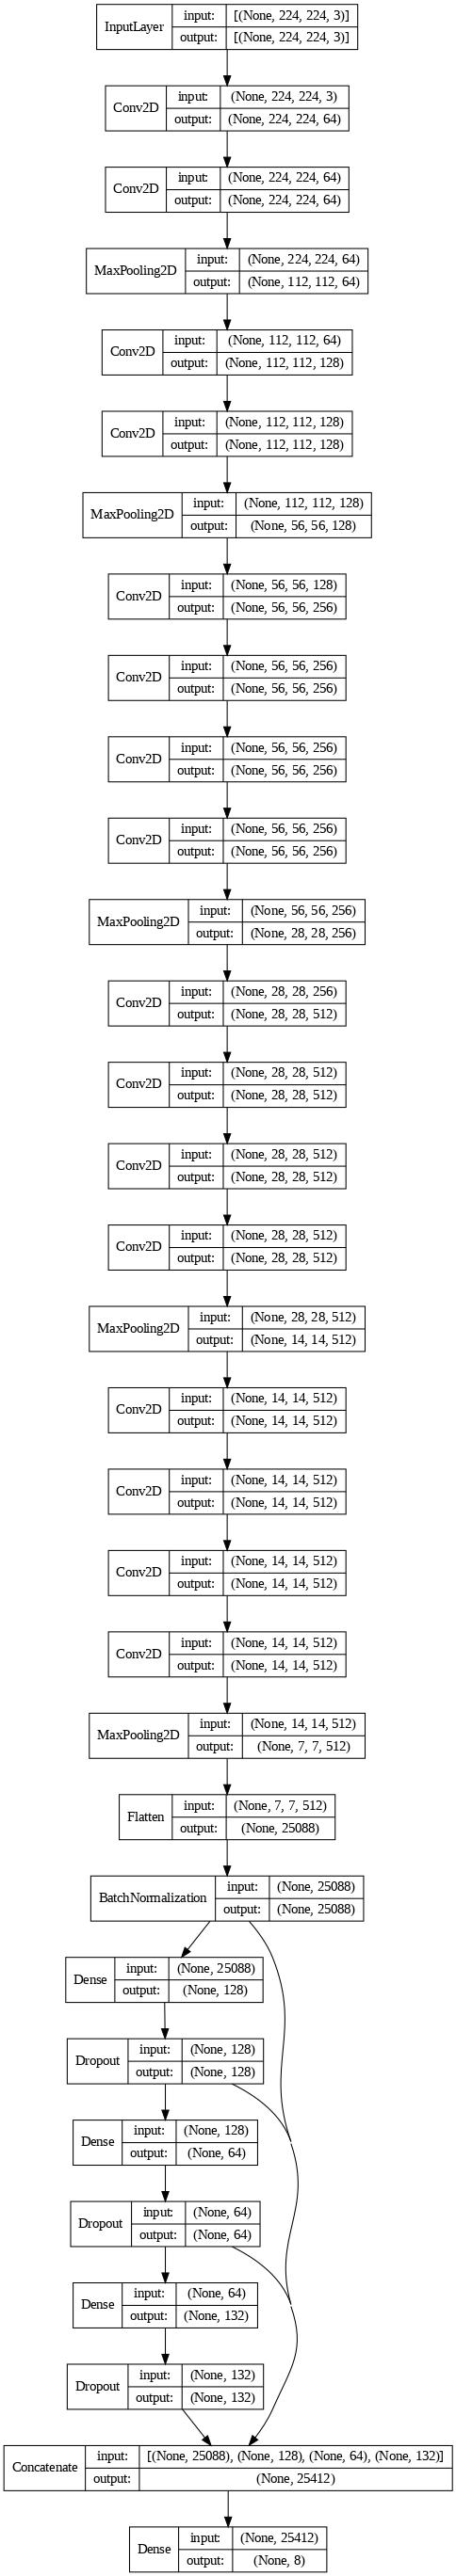

In [19]:
from tensorflow.keras.utils import plot_model
plot_model(
    full_model,
    to_file="/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/model_VGG19.jpg",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    rankdir="TB",
    expand_nested=False,
    dpi=75
)

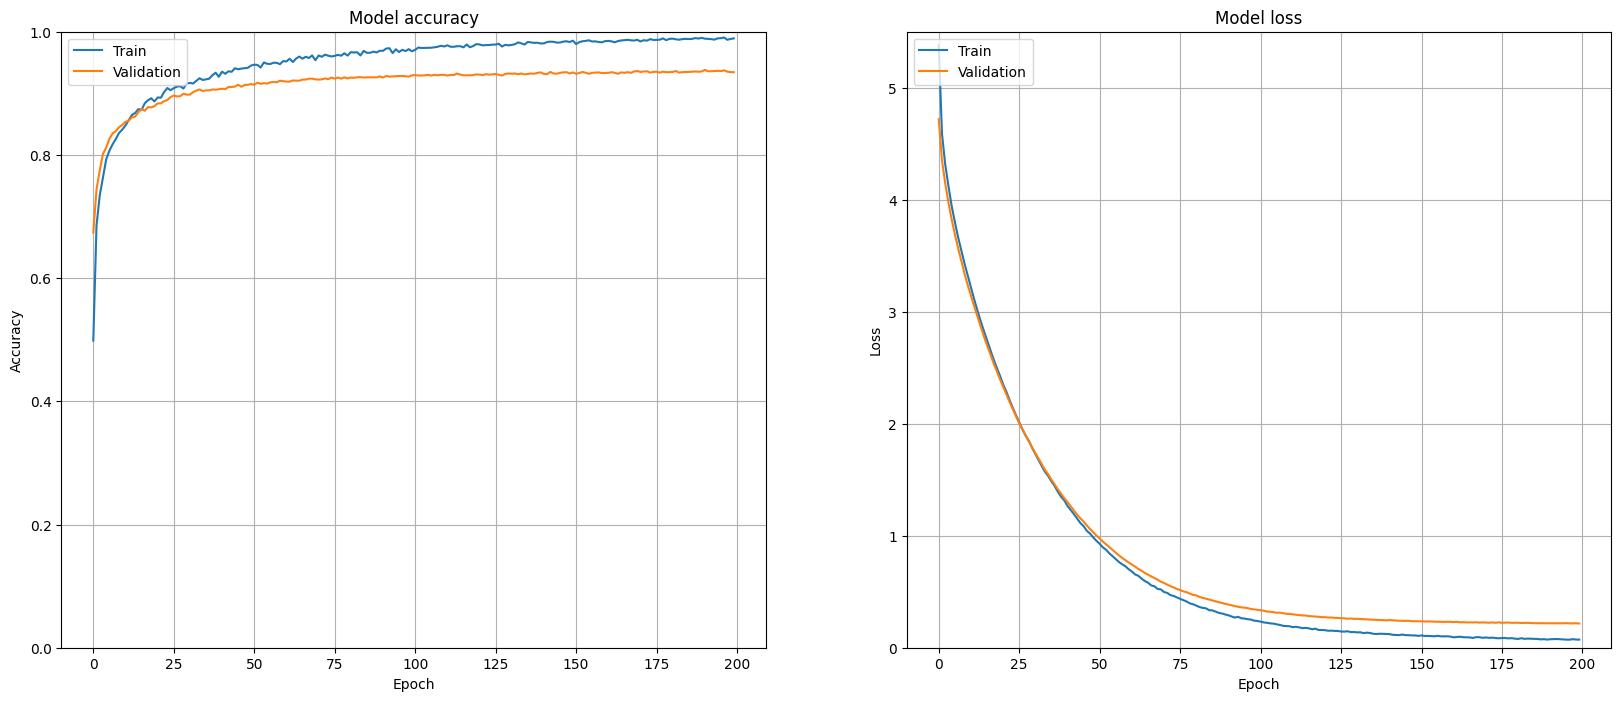

In [23]:
# Plot training & validation accuracy values
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylim([0, 1]) # set y-axis limits
axs[0].legend(['Train', 'Validation'], loc='upper left')
axs[0].grid(True)


# Plot training & validation loss values
axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('Model loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylim([0, 5.5]) # set y-axis limits
axs[1].legend(['Train', 'Validation'], loc='upper left')
axs[1].grid(True)
plt.savefig('/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Accuracy_vs_Loss_VGG19.png')
plt.show()


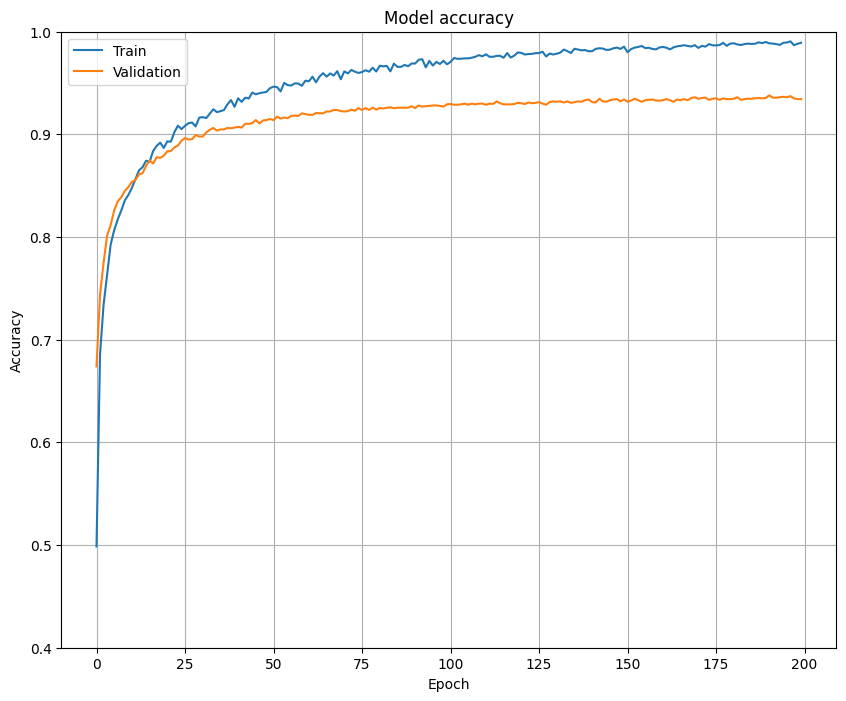

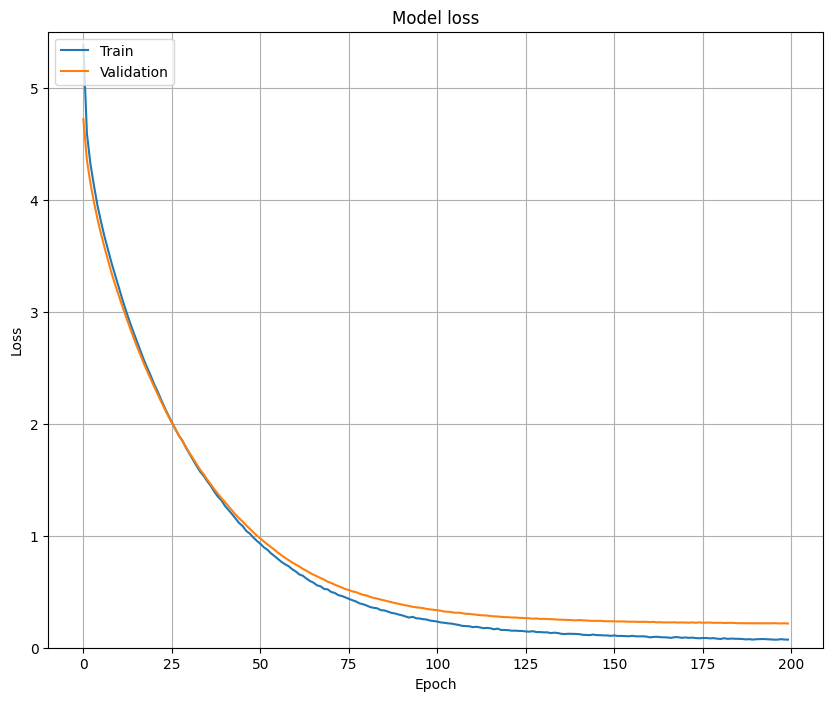

In [26]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.ylim([0.4, 1.0])
plt.savefig('/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Accuracy_VGG19.png')

# Plot training & validation loss values
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.ylim([0.0, 5.5])
plt.savefig('/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Loss_VGG19.png')


In [27]:
full_model.save("/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/MSvBrainTumor_VGG19.h5")

In [28]:
y_pred = full_model.predict(X_test)

86/86 [==============================] - 4s 32ms/step


In [29]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

info = ['Glioma', 'Meningioma', 'Pituitary', 'No Tumor', 'Healthy Axial', 'MS Axial', 'Healthy Sagittal', 'MS Sagittal']

y_pred = np.argmax(y_pred, axis=1) 
y_test = np.argmax(y_test, axis=1)
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, target_names=info))

# Save metrics to CSV
metrics = {'Accuracy': accuracy_score, 'Classification report': classification_report}
df = pd.DataFrame(metrics.items(), columns=['Metric', 'Value'])
df.to_csv('/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/metrics_VGG19.csv', index=False)

Accuracy : 0.9343544857768052
                  precision    recall  f1-score   support

          Glioma       0.96      0.93      0.94       394
      Meningioma       0.90      0.89      0.90       407
       Pituitary       0.95      0.98      0.97       440
        No Tumor       0.97      0.98      0.97       471
   Healthy Axial       0.90      0.91      0.91       305
        MS Axial       0.87      0.84      0.86       208
Healthy Sagittal       0.93      0.98      0.95       291
     MS Sagittal       0.96      0.90      0.93       226

        accuracy                           0.93      2742
       macro avg       0.93      0.93      0.93      2742
    weighted avg       0.93      0.93      0.93      2742



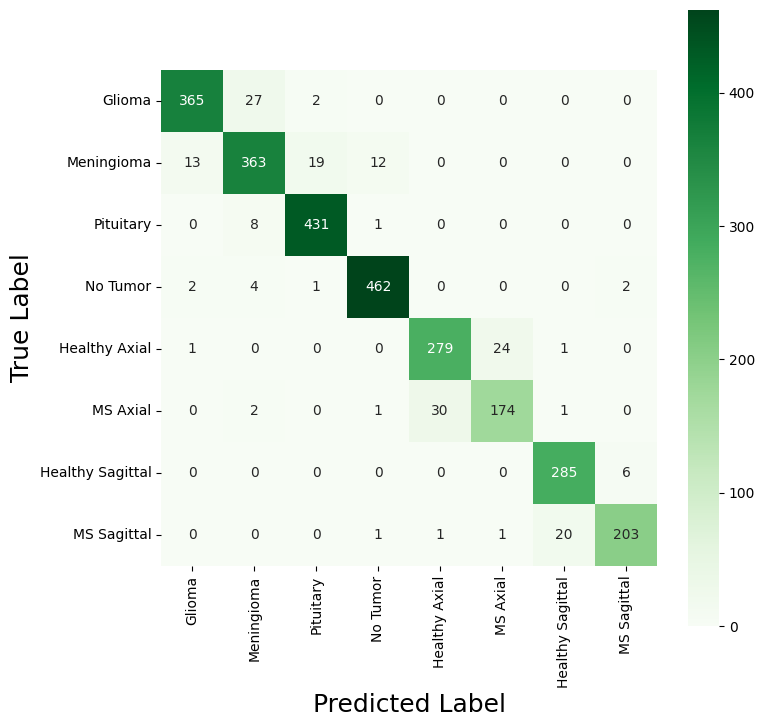

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
info = ['Glioma', 'Meningioma', 'Pituitary', 'No Tumor', 'Healthy Axial', 'MS Axial', 'Healthy Sagittal', 'MS Sagittal']
plt.figure(figsize=(8, 8))
sns.heatmap(cm, cmap='Greens', annot=True, fmt='d', square=True, xticklabels=info, yticklabels=info)
plt.ylabel('True Label', fontsize=18)
plt.xlabel('Predicted Label', fontsize=18)
plt.savefig('/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/confusion_matrix_VGG19.png')
plt.show()

In [31]:
# Define the file paths
paths = ['/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Brain_Tumor_MRI/Training/glioma',
         '/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Brain_Tumor_MRI/Training/meningioma',
         '/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Brain_Tumor_MRI/Training/pituitary',
         '/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Brain_Tumor_MRI/Training/notumor',
         '/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Brain_Tumor_MRI/Testing/glioma',
         '/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Brain_Tumor_MRI/Testing/meningioma',
         '/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Brain_Tumor_MRI/Testing/pituitary',
         '/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Brain_Tumor_MRI/Testing/notumor',
         '/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Dataset_Option2/archive/Multiple Sclerosis/Control-Axial',
         '/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Dataset_Option2/archive/Multiple Sclerosis/MS-Axial',
         '/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Dataset_Option2/archive/Multiple Sclerosis/Control-Sagittal',
         '/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Dataset_Option2/archive/Multiple Sclerosis/MS-Sagittal']


1/1 [==============================] - 0s 497ms/step


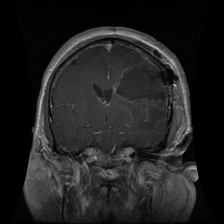

Chosen file path: /content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Brain_Tumor_MRI/Testing/glioma
Predicted class: Glioma


In [32]:
import tensorflow as tf
import numpy as np
import random
import os
from PIL import Image

# Choose a random file path and a random image from it
chosen_path = random.choice(paths)
file_names = os.listdir(chosen_path)
chosen_file_name = random.choice(file_names)
img_path = os.path.join(chosen_path, chosen_file_name)

# Load the saved model
model = tf.keras.models.load_model('/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/MSvBrainTumor_VGG19.h5')

# Load the image you want to classify
img = Image.open(img_path).convert('RGB')
img = img.resize((224, 224))  # Resize the image to match the input size of the model

# Preprocess the image
img_arr = np.array(img)
img_arr = img_arr.astype('float32')
img_arr /= 255.0
img_arr = np.expand_dims(img_arr, axis=0)  # Add a batch dimension

# Make a prediction using the model
pred = model.predict(img_arr)

class_names = ['Glioma', 'Meningioma', 'Pituitary', 'No Tumor', 'Healthy Axial', 'MS Axial', 'Healthy Sagittal', 'MS Sagittal']
predicted_class_name = class_names[np.argmax(pred)]

# You can also get the probability of each class
class_probabilities = pred[0]

# Print the chosen file path, the predicted class, and the probability of each class
img.show()
print('Chosen file path:', chosen_path)
print('Predicted class:', predicted_class_name)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(dataset, label, test_size = 0.30, random_state = 0)

In [34]:
X_train = X_train /255.
X_test = X_test /255.

In [35]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [39]:
# define the input tensor
input_tensor = keras.layers.Input(shape=(224,224,3))

# build the convolutional base
densenet = keras.applications.DenseNet121(weights='imagenet', include_top=False, input_tensor=input_tensor)
for layer in densenet.layers: 
    layer.trainable = False

# add skip connections
x = densenet.output
x = keras.layers.Flatten()(x)
x = keras.layers.BatchNormalization()(x)

# add L2 regularization to the fully connected layers
x1 = keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
x1 = keras.layers.Dropout(0.5)(x1)
x2 = keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x1)
x2 = keras.layers.Dropout(0.5)(x2)
x3 = keras.layers.Dense(132, activation='relu', kernel_regularizer=l2(0.01))(x2)
x3 = keras.layers.Dropout(0.5)(x3)

x = keras.layers.Concatenate()([x, x1, x2, x3])
predictions = keras.layers.Dense(8, activation='softmax')(x)

# create the model
full_model = keras.models.Model(inputs=input_tensor, outputs=predictions)

# compile the model
full_model.compile(loss='categorical_crossentropy',
                    optimizer=keras.optimizers.Adamax(learning_rate=0.00001),
                    metrics=['accuracy'])

# print the model summary
full_model.summary()

# train the model with callbacks
checkp = ModelCheckpoint('./unet_model.h5', monitor='accuracy', save_best_only=True, verbose=1)
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1, restore_best_weights=True)
history = full_model.fit(X_train, y_train, batch_size=8, epochs=150, validation_data=(X_test, y_test), workers=10, callbacks=[checkp])



Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_4[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_2[0][0]']       
                                )                                                           

In [40]:
from tensorflow.keras.utils import plot_model
plot_model(
    full_model,
    to_file="/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/model_densenet.jpg",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    rankdir="TB",
    expand_nested=False,
    dpi=75
)

Output hidden; open in https://colab.research.google.com to view.

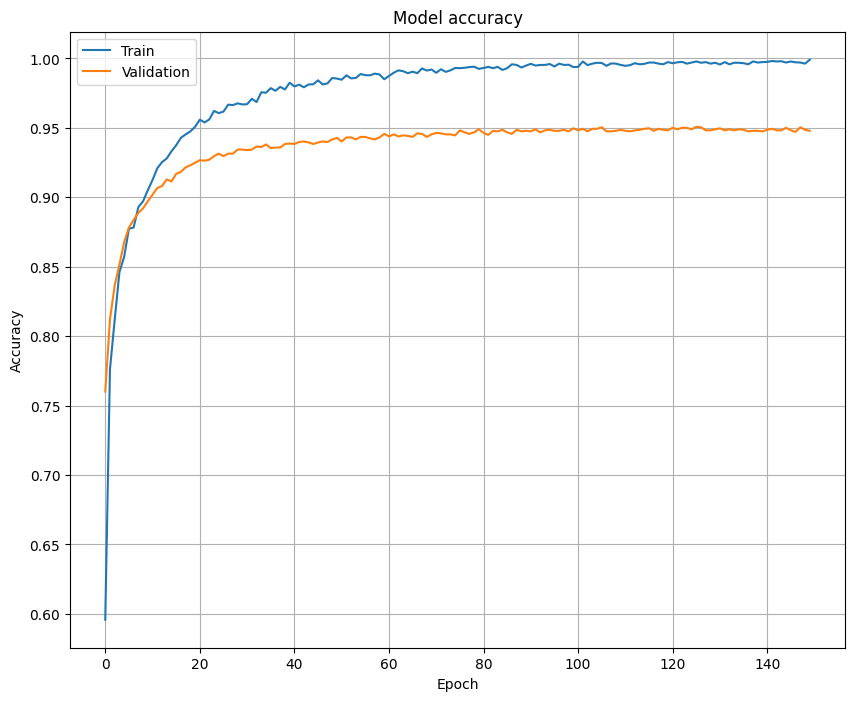

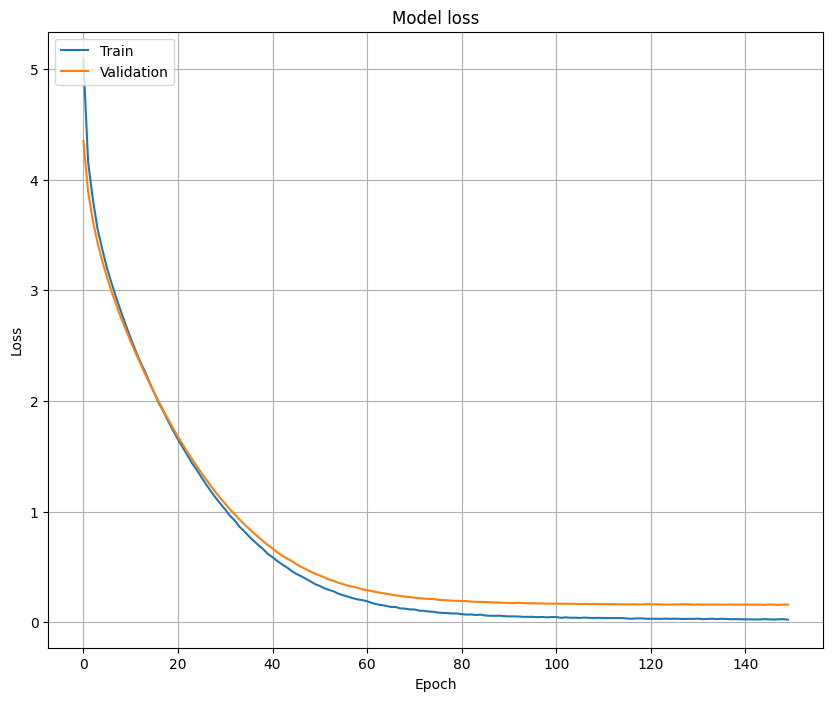

In [41]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.savefig('/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Accuracy_densenet.png')

# Plot training & validation loss values
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.savefig('/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/Loss_densenet.png')

In [42]:
full_model.save("/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/MSvBrainTumor_densenet.h5")

In [43]:
y_pred = full_model.predict(X_test)

86/86 [==============================] - 4s 21ms/step


In [44]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

info = ['Glioma', 'Meningioma', 'Pituitary', 'No Tumor', 'Healthy Axial', 'MS Axial', 'Healthy Sagittal', 'MS Sagittal']

y_pred = np.argmax(y_pred, axis=1) 
y_test = np.argmax(y_test, axis=1)
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, target_names=info))

# Save metrics to CSV
metrics = {'Accuracy': accuracy_score, 'Classification report': classification_report}
df = pd.DataFrame(metrics.items(), columns=['Metric', 'Value'])
df.to_csv('/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/metrics_densenet.csv', index=False)

Accuracy : 0.9478482859226842
                  precision    recall  f1-score   support

          Glioma       0.98      0.94      0.96       394
      Meningioma       0.92      0.91      0.92       407
       Pituitary       0.96      0.98      0.97       440
        No Tumor       0.96      0.99      0.98       471
   Healthy Axial       0.93      0.95      0.94       305
        MS Axial       0.93      0.88      0.91       208
Healthy Sagittal       0.93      0.98      0.95       291
     MS Sagittal       0.96      0.88      0.92       226

        accuracy                           0.95      2742
       macro avg       0.95      0.94      0.94      2742
    weighted avg       0.95      0.95      0.95      2742



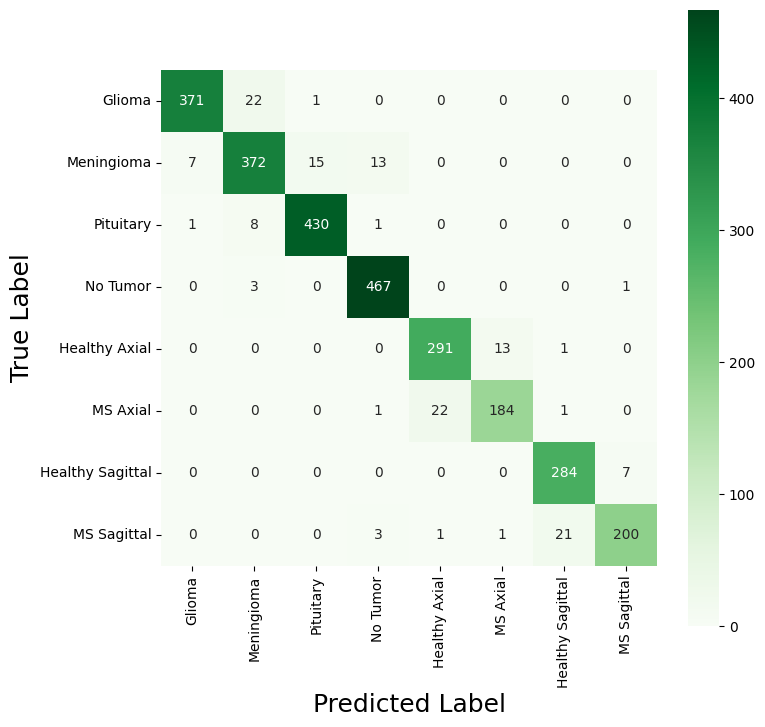

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
info = ['Glioma', 'Meningioma', 'Pituitary', 'No Tumor', 'Healthy Axial', 'MS Axial', 'Healthy Sagittal', 'MS Sagittal']
plt.figure(figsize=(8, 8))
sns.heatmap(cm, cmap='Greens', annot=True, fmt='d', square=True, xticklabels=info, yticklabels=info)
plt.ylabel('True Label', fontsize=18)
plt.xlabel('Predicted Label', fontsize=18)
plt.savefig('/content/drive/MyDrive/JohnSmith_FinalProject_BioMed/confusion_matrix_densenet.png')
plt.show()